# Create a convolutional neural network (CNN)
model = tf.keras.quential([
    Cotf.keras.layers.nv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(64, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(128, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Fltf.keras.layers.atten(),
    Detf.keras.layers.nse(128, activation='relu'),
    Detf.keras.layers.nse(len(clothing_names), activation='softmax')
])tf

In [1]:
#----------------------------IMPORTS----------------------------
import cv2
import numpy as np
import os
import random
import pickle
import tensorflow as tf
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
path = 'D:\Senior II\Graduation Project\Datasets\Clothes\Dataset_1'
df = pd.read_csv(path + '/images.csv')
df.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [4]:
#Remove all entries with label = Not sure
df = df[df['label'] != 'Not sure']
#Remove colums: sender_id and kids
df = df.drop(['sender_id', 'kids'], axis=1)
df.head()

,image,label
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
5,5d3a1404-697f-479f-9090-c1ecd0413d27,Shorts
6,b0c03127-9dfb-4573-8934-1958396937bf,Shirt


In [5]:
#Extract the unique labels
class_names = df['label'].unique()
print(f'There are {class_names.shape[0]} unique classes')
class_ids = dict()
for i in range(len(class_names)):
    class_ids[class_names[i]] = i

There are 19 unique classes


In [7]:
image_width = image_height = 100
total_images = 5000

In [20]:
#Upload photos to a numpy array
images = []
images_labels = []
# for i in range(len(df['image'])):
for i in range(5000):
    #Check if df['image'][i] is in
    if (i in df['image'].keys()):
        img = cv2.imread(path + '/' + df['image'][i] + '.jpg')
        #Check if image is not None
        if (img is not None):
            images.append(cv2.resize(img, (image_width, image_height)))
            images_labels.append(class_ids[df['label'][i]])

m = int(len(images) * 0.8)
m_test = len(images) - m

            
x_train = np.array(images[:m + 1]).astype(float)
y_train = np.array(images_labels[:m + 1])

x_test = np.array(images[m + 1:]).astype(float)
y_test = np.array(images_labels[m + 1:])

This image is of a Pants


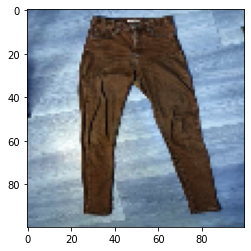

In [14]:
#Show an image from x_train
index = 1500
plt.imshow(x_train[index].astype(np.uint8))
print(f'This image is of a {class_names[y_train[index]]}')
plt.show()

In [21]:
#Number of training examples
m = x_train.shape[0]
m_test = x_test.shape[0]

#Reshape the training and test examples
# x_train = x_train.reshape(m, -1)
# x_test = x_test.reshape(m_test, -1)

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (3829, 100, 100, 3)
y_train.shape = (3829,)
x_test.shape = (957, 100, 100, 3)
y_test.shape = (957,)


In [23]:
# Create a convolutional neural network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (image_height, image_height, 3), name = 'Conv1'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max1'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name = 'Conv2'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name = 'Conv3'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max3'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = 'Dense1'),
    tf.keras.layers.Dense(len(class_names), activation='linear', name = 'Dense2')
])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [24]:
# Train the model on the training data
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
39/39 [==============================] - 18s 434ms/step - loss: 13.3203 - accuracy: 0.2596
Epoch 2/10
39/39 [==============================] - 17s 432ms/step - loss: 3.6736 - accuracy: 0.4359
Epoch 3/10
39/39 [==============================] - 16s 417ms/step - loss: 3.1559 - accuracy: 0.5443
Epoch 4/10
39/39 [==============================] - 15s 379ms/step - loss: 2.7142 - accuracy: 0.6328
Epoch 5/10
39/39 [==============================] - 17s 434ms/step - loss: 2.3875 - accuracy: 0.7096
Epoch 6/10
39/39 [==============================] - 18s 466ms/step - loss: 2.1546 - accuracy: 0.7574
Epoch 7/10
39/39 [==============================] - 19s 485ms/step - loss: 1.9206 - accuracy: 0.8151
Epoch 8/10
39/39 [==============================] - 19s 474ms/step - loss: 1.7759 - accuracy: 0.8459
Epoch 9/10
39/39 [==============================] - 19s 474ms/step - loss: 1.5965 - accuracy: 0.8940
Epoch 10/10
39/39 [==============================] - 17s 443ms/step - loss: 1.4729 - accur

In [25]:
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')

30/30 [==============================] - 1s 40ms/step - loss: 3.2751 - accuracy: 0.5381
Train Accuracy = 94.93 % with 3829 training examples
Test Accuracy = 53.81 % with 957 test examples


In [26]:
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')

30/30 [==============================] - 1s 38ms/step - loss: 3.2751 - accuracy: 0.5381
Train Accuracy = 94.93 % with 3829 training examples
Test Accuracy = 53.81 % with 957 test examples


In [22]:
#Delete previous model
del model

In [ ]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)
train_count_correct = 0
test_count_correct = 0
for i in range(m):
    predicted = np.argmax(train_predictions[i])
    if (predicted == y_train[i]):
        train_count_correct += 1
train_accuracy = train_count_correct / m

for i in range(m_test):
    predicted = np.argmax(test_predictions[i])
    if (predicted == y_test[i]):
        test_count_correct += 1
test_accuracy = test_count_correct / m_test

print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')


In [27]:
prediction = model.predict(x_train[np.newaxis,0])
prediction
class_names[np.argmax(prediction)]

1/1 [==============================] - 0s 104ms/step


'T-Shirt'

In [ ]:
#Plot loss vs epochs
plt.plot(history.history['loss'])
plt.show()

In [28]:
# Save the trained model
pickle.dump(model, open('clothing_detector.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    

In [ ]:
# Plot a summary of your model's architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

In [ ]:
#Delete previous model
del model